In [5]:
!mkdir train_local
!unzip '/content/drive/MyDrive/機器學習概論/Final/creditcard.csv.zip' -d '/content/train_local'

Archive:  /content/drive/MyDrive/機器學習概論/Final/creditcard.csv.zip
  inflating: /content/train_local/creditcard.csv  


In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
path = '/content/train_local/creditcard.csv'

In [8]:
data = pd.read_csv(path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


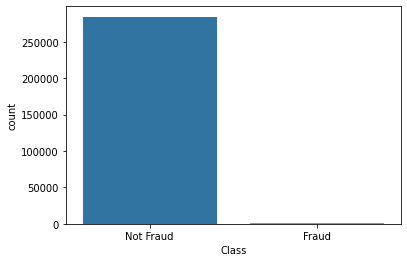

In [10]:
graph = sns.countplot(data['Class'])
graph.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [11]:
#class_count
class_count_0, class_count_1 = data['Class'].value_counts()

#separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

print('Class 0:', class_0.shape)
print('Class 1:', class_1.shape)

Class 0: (284315, 31)
Class 1: (492, 31)


In [12]:
display('Class 0 describtion:', class_0.describe())
display('Class 1 describtion:', class_1.describe())

'Class 0 describtion:'

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,1.003112,0.945939,0.995067,0.897007,0.915060,0.844772,0.749457,0.824919,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.797473,-15.144988,-5.791881,-18.392091,-4.391307,-10.115560,-17.098444,-5.366660,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,-0.763447,-0.402102,-0.648067,-0.422453,-0.582812,-0.465543,-0.482644,-0.497414,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,-0.034923,0.141679,-0.013547,0.051947,0.048294,0.067377,-0.064833,-0.002787,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,0.736362,0.619207,0.662492,0.494104,0.648842,0.523738,0.399922,0.501103,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


'Class 1 describtion:'

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.278940,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,1.973397,-8.688177,-0.979117,-9.692723,-0.643539,-6.562915,-11.945057,-4.664576,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,5.307078,-2.974088,0.672964,-4.282821,0.609189,-1.226043,-1.341940,0.091772,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


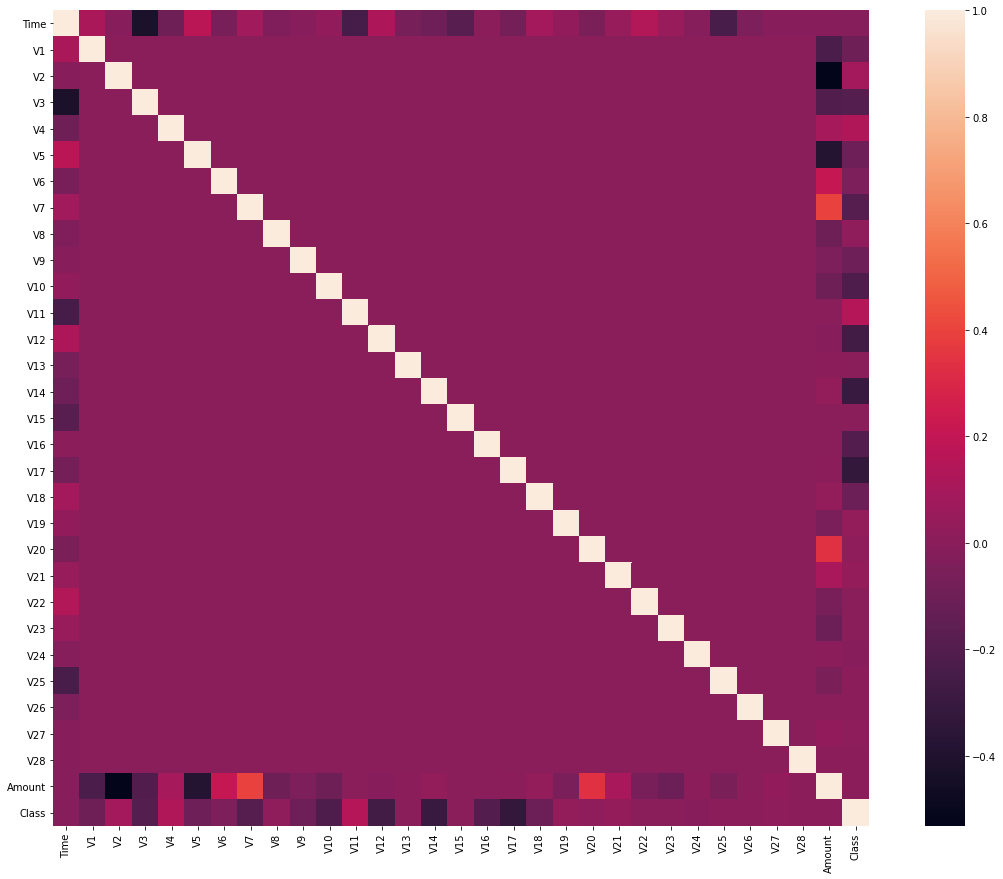

In [13]:
corr_data = data.corr()
fig = plt.figure(figsize=(20,15))
sns.heatmap(corr_data, square=True)
plt.show()

In [14]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


total class of 0&1: 
 1    492
0    492
Name: Class, dtype: int64


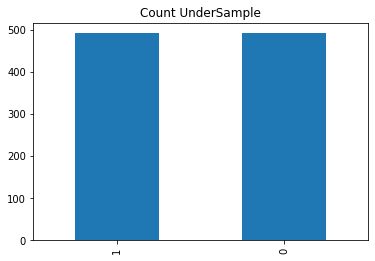

In [15]:
#Random Under-Sampling
#removing some observations of the majority class.

class_0_under = class_0.sample(class_count_1) #(len(class_count_1), 1)

test_under = pd.concat([class_0_under, class_1], axis=0)
print('total class of 0&1: \n', test_under['Class'].value_counts())

test_under['Class'].value_counts().plot(kind='bar', title='Count UnderSample')

total class of 0&1: 
 1    284315
0    284315
Name: Class, dtype: int64


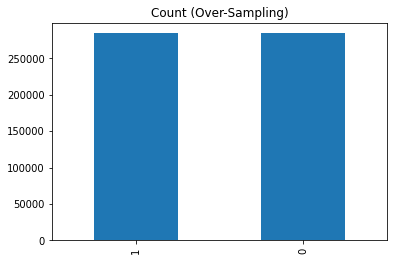

In [16]:
#Random Over-Sampling
#adding more copies to the minority class

class_1_over = class_1.sample(class_count_0, replace=True) #replace:Allow sampling of the same row more than once

test_over = pd.concat([class_1_over, class_0], axis=0)

print('total class of 0&1: \n', test_over['Class'].value_counts())

test_over['Class'].value_counts().plot(kind='bar', title='Count (Over-Sampling)')


In [17]:
from sklearn.model_selection import train_test_split
from collections import Counter

print(Counter(data['Class']))

Counter({0: 284315, 1: 492})


In [18]:
import imblearn
#Random under_sampling with imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

x_res, y_res = rus.fit_resample(x, y) #x is feature, y is label(data['Class'])

print('Original Dataset Shape:', Counter(y))
print('Resample Dataset Shape:', Counter(y_res))


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Original Dataset Shape: Counter({0: 284315, 1: 492})
Resample Dataset Shape: Counter({0: 492, 1: 492})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [19]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42) #In over-sampling, there is no need to replace the sample, because the sample is pretty small.

x_ros, y_ros = ros.fit_resample(x, y)

print('Original Dataset Shape:', Counter(y))
print('Reasample Dataset Shape:', Counter(y_ros))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original Dataset Shape: Counter({0: 284315, 1: 492})
Reasample Dataset Shape: Counter({0: 284315, 1: 284315})


# OverSamping Using SMOTE(Synthetic Minority OverSampling Technique) 

SMOTE: 相對於少數類樣本A, 隨機選擇一個最近鄰的樣本B, 然後從A與B的連線上隨機選取一個點C作為新的少數類樣本。

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
smote = SMOTE() #regular
x_resampled_smote, y_resampled_smote = smote.fit_sample(x, y)
print('Original Dataset Shape:' ,Counter(y))
print('Resample Dataset Shape:' ,Counter(y_resampled_smote))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original Dataset Shape: Counter({0: 284315, 1: 492})
Resample Dataset Shape: Counter({0: 284315, 1: 284315})


SMOTE(borderline1)

In [22]:
smote_1 = SMOTE(kind='borderline1')
x_resampled_smote1, y_resampled_smote1 = smote_1.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resample Dataset Shape:', Counter(y_resampled_smote1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original Dataset Shape: Counter({0: 284315, 1: 492})
Resample Dataset Shape: Counter({0: 284315, 1: 284315})


SMOTE(borderline2)

In [23]:
smote_2 = SMOTE(kind='borderline2')
x_resampled_smote2, y_resampled_smote2 = smote_2.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resample DataSet Shape:', Counter(y_resampled_smote2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original Dataset Shape: Counter({0: 284315, 1: 492})
Resample DataSet Shape: Counter({0: 284315, 1: 284314})


SMOTE(SVM)

In [24]:
smote_svm = SMOTE(kind='svm')
x_resampled_smotesvm, y_resampled_smotesvm = smote_svm.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resample Dataset Shape:', Counter(y_resampled_smotesvm))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Original Dataset Shape: Counter({0: 284315, 1: 492})
Resample Dataset Shape: Counter({0: 284315, 1: 284315})


#OverSampling Using ADASYN(Adaptive Synthetic)
ADASYN: 關注的是在那些基於K最近鄰分類器被錯誤分類的原始樣本附近生成新的少數樣類本

In [25]:
from imblearn.over_sampling import ADASYN

In [26]:
ada = ADASYN()
x_resampled_adasyn, y_resampled_adasyn = ada.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resample Dataset Shape:', Counter(y_resampled_adasyn))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original Dataset Shape: Counter({0: 284315, 1: 492})
Resample Dataset Shape: Counter({0: 284315, 1: 284298})


#UnderSampling Using NearMiss
NearMiss-1

In [27]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(random_state=0, version=1)
x_resampled_nm1, y_resampled_nm1 = nm1.fit_sample(x, y)

print('Original Dataset Shape:', Counter(y))
print('Resample Dataset Shape:', Counter(y_resampled_nm1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original Dataset Shape: Counter({0: 284315, 1: 492})
Resample Dataset Shape: Counter({0: 492, 1: 492})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


NearMiss-2

In [28]:
nm2 = NearMiss(random_state=0, version=2)
x_resampled_nm2, y_resampled_nm2 = nm2.fit_sample(x, y)

print('Original Dataset Shape:', Counter(y))
print('Resample Dataset Shape:', Counter(y_resampled_nm2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original Dataset Shape: Counter({0: 284315, 1: 492})
Resample Dataset Shape: Counter({0: 492, 1: 492})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


NearMiss-3

In [29]:
nm3 = NearMiss(random_state=0, version=3)
x_resampled_nm3, y_resampled_nm3 = nm3.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resample Dataset Shape:', Counter(y_resampled_nm3))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original Dataset Shape: Counter({0: 284315, 1: 492})
Resample Dataset Shape: Counter({0: 492, 1: 492})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#UnderSamling Using Prototype Generation

In [30]:
from imblearn.under_sampling import ClusterCentroids

In [31]:
cc = ClusterCentroids(random_state=0)
x_resampled_cc, y_resampled_cc = cc.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resampled Dataset Shape:', Counter(y_resampled_cc))

Original Dataset Shape: Counter({0: 284315, 1: 492})
Resampled Dataset Shape: Counter({0: 492, 1: 492})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#Cleaning UnderSampling Techinques
Tomek's link


In [32]:
from imblearn.under_sampling import TomekLinks

In [33]:
tl = TomekLinks(random_state=0)
x_resampled_tl, y_resampled_tl = tl.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resampled Dataset Shape:', Counter(y_resampled_tl))


Original Dataset Shape: Counter({0: 284315, 1: 492})
Resampled Dataset Shape: Counter({0: 284244, 1: 492})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Edited data set using nearest neighbours(ENN)

In [34]:
from imblearn.under_sampling import EditedNearestNeighbours

In [35]:
enn = EditedNearestNeighbours(random_state=0)
x_resampled_enn, y_resampled_enn = enn.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resampled Dataset Shape:', Counter(y_resampled_enn))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original Dataset Shape: Counter({0: 284315, 1: 492})
Resampled Dataset Shape: Counter({0: 283892, 1: 492})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Repeated Edited Nearest Neighbours(RENN)

In [36]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

In [37]:
renn = RepeatedEditedNearestNeighbours(random_state=0)
x_resampled_renn, y_resampled_renn = renn.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resampled Dataset Sahpe:', Counter(y_resampled_renn))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Original Dataset Shape: Counter({0: 284315, 1: 492})
Resampled Dataset Sahpe: Counter({0: 283698, 1: 492})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ALLKNN

In [38]:
from imblearn.under_sampling import AllKNN

In [39]:
allknn = AllKNN(random_state=0)
x_resampled_allknn, y_resampled_allknn = allknn.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resampled Dataset Shape:', Counter(y_resampled_allknn))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Original Dataset Shape: Counter({0: 284315, 1: 492})
Resampled Dataset Shape: Counter({0: 283801, 1: 492})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [40]:
from imblearn.under_sampling import OneSidedSelection

In [41]:
oss = OneSidedSelection(random_state=0)
x_resampled_oss, y_resampled_oss = oss.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resampled Dataset Shape:', Counter(y_resampled_oss))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original Dataset Shape: Counter({0: 284315, 1: 492})
Resampled Dataset Shape: Counter({0: 283292, 1: 492})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Neighbourhood CleaningRule

In [42]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [43]:
ncr = NeighbourhoodCleaningRule(random_state=0)
x_resampled_ncr, y_resampled_ncr = ncr.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resampled Dataset Shape:', Counter(y_resampled_ncr))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original Dataset Shape: Counter({0: 284315, 1: 492})
Resampled Dataset Shape: Counter({0: 283068, 1: 492})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold(random_state=0, estimator=LogisticRegression())
x_resampled_iht, y_resampled_iht = iht.fit_sample(x, y)
print('Original Dataset Shape:', Counter(y))
print('Resampled Dataset Shape:', Counter(y_resampled_iht))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

Original Dataset Shape: Counter({0: 284315, 1: 492})
Resampled Dataset Shape: Counter({0: 493, 1: 492})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

#RandomUnderSampling

In [46]:
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_res, y_res, test_size=0.2, random_state=42)
print(x_train_res.shape)
print(x_test_res.shape)
print(y_train_res.shape)
print(y_test_res.shape)

(787, 30)
(197, 30)
(787,)
(197,)


The model used is Random Forest classifier
The accuracy is 0.9289340101522843
The precision is 0.9666666666666667
The recall is 0.8877551020408163
The F1-Score is 0.9255319148936171
The Matthews correlation coefficient is0.8606515308824143


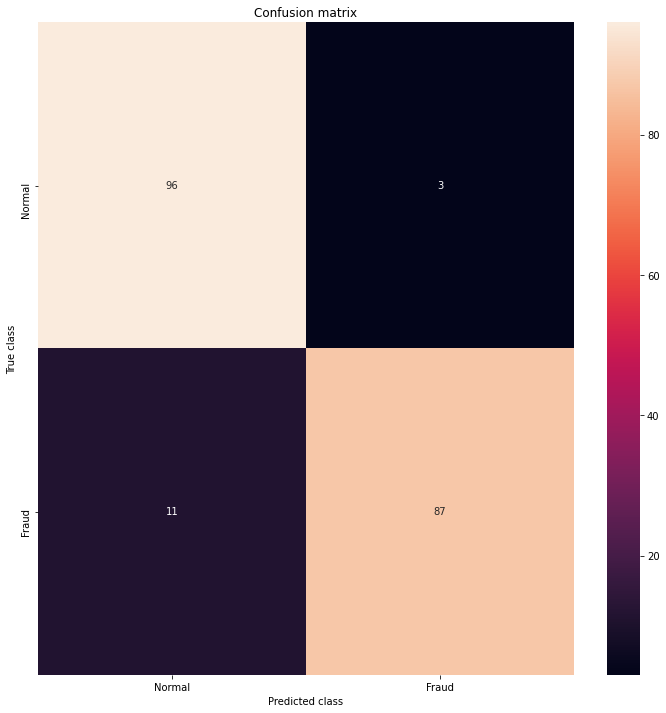

In [47]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(x_train_res, y_train_res) 
yPred = rfc.predict(x_test_res)

n_errors = (yPred != y_test_res).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(y_test_res, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test_res, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test_res, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test_res, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test_res, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test_res, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

#RandomOverSampling

In [48]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)
print(x_train_ros.shape)
print(x_test_ros.shape)
print(y_train_ros.shape)
print(y_test_ros.shape)

(454904, 30)
(113726, 30)
(454904,)
(113726,)


The model used is Random Forest classifier
The accuracy is 0.9999560346798445
The precision is 0.9999122514522385
The recall is 1.0
The F1-Score is 0.9999561238010829
The Matthews correlation coefficient is0.9999120728626671


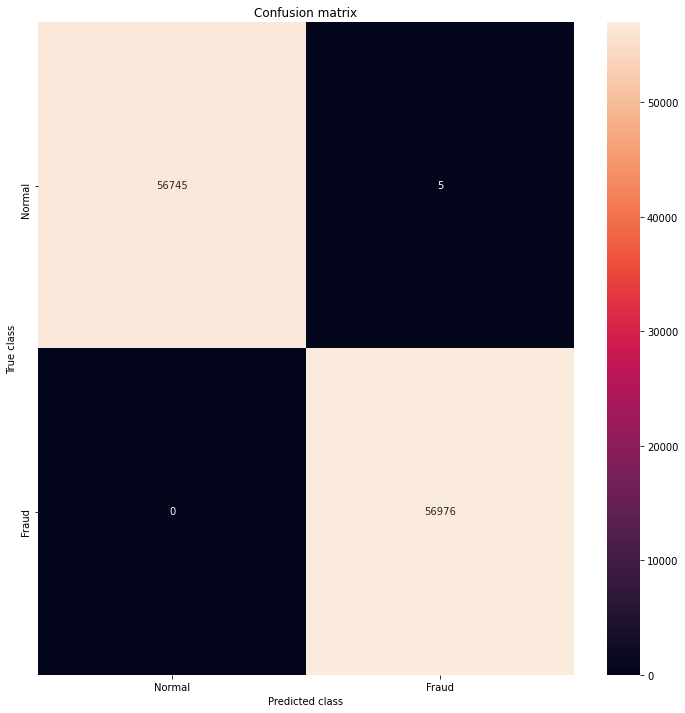

In [49]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(x_train_ros, y_train_ros) 
yPred = rfc.predict(x_test_ros)

n_errors = (yPred != y_test_ros).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(y_test_ros, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test_ros, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test_ros, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test_ros, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test_ros, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test_ros, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

#SMOTE(regular)

In [50]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)
print(x_train_smote.shape)
print(x_test_smote.shape)
print(y_train_smote.shape)
print(y_test_smote.shape)

(454904, 30)
(113726, 30)
(454904,)
(113726,)


The model used is Random Forest classifier
The accuracy is 0.9998944832316269
The precision is 0.9998069701330151
The recall is 0.999982448750351
The F1-Score is 0.9998947017426862
The Matthews correlation coefficient is0.9997889810165724


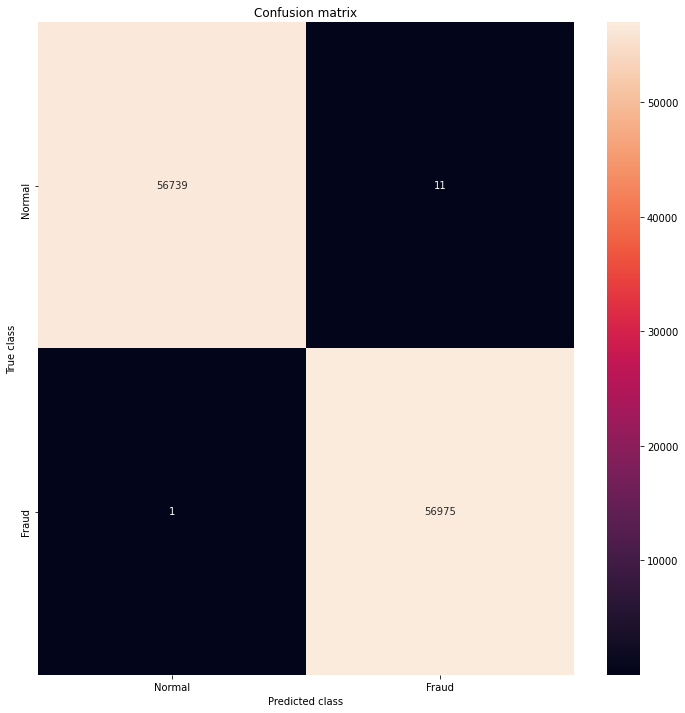

In [51]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(x_train_smote, y_train_smote) 
yPred = rfc.predict(x_test_smote)

n_errors = (yPred != y_test_smote).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(y_test_smote, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test_smote, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test_smote, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test_smote, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test_smote, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test_smote, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

#SMOTE(borderline1)

In [52]:
x_train_smote1, x_test_smote1, y_train_smote1, y_test_smote1 = train_test_split(x_resampled_smote1, y_resampled_smote1, test_size=0.2, random_state=42)
print(x_train_smote1.shape)
print(x_test_smote1.shape)
print(y_train_smote1.shape)
print(y_test_smote1.shape)

(454904, 30)
(113726, 30)
(454904,)
(113726,)


The model used is Random Forest classifier
The accuracy is 0.9998856901675958
The precision is 0.9999122391308164
The recall is 0.9998595900028082
The F1-Score is 0.9998859138737505
The Matthews correlation coefficient is0.9997713808477332


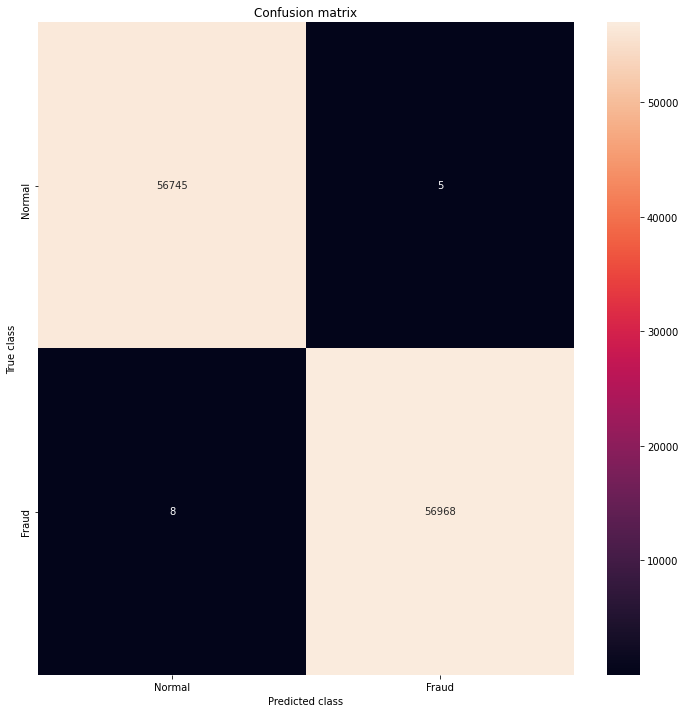

In [53]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(x_train_smote1, y_train_smote1) 
yPred = rfc.predict(x_test_smote1)

n_errors = (yPred != y_test_smote1).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(y_test_smote1, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test_smote1, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test_smote1, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test_smote1, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test_smote1, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test_smote1, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

#SMOTE(borderline2)

In [54]:
x_train_smote2, x_test_smote2, y_train_smote2, y_test_smote2 = train_test_split(x_resampled_smote2, y_resampled_smote2, test_size=0.2, random_state=42)
print(x_train_smote2.shape)
print(x_test_smote2.shape)
print(y_train_smote2.shape)
print(y_test_smote2.shape)

(454903, 30)
(113726, 30)
(454903,)
(113726,)


The model used is Random Forest classifier
The accuracy is 0.9998593109755025
The precision is 0.9998594814866859
The recall is 0.9998594814866859
The F1-Score is 0.9998594814866859
The Matthews correlation coefficient is0.9997186215366911


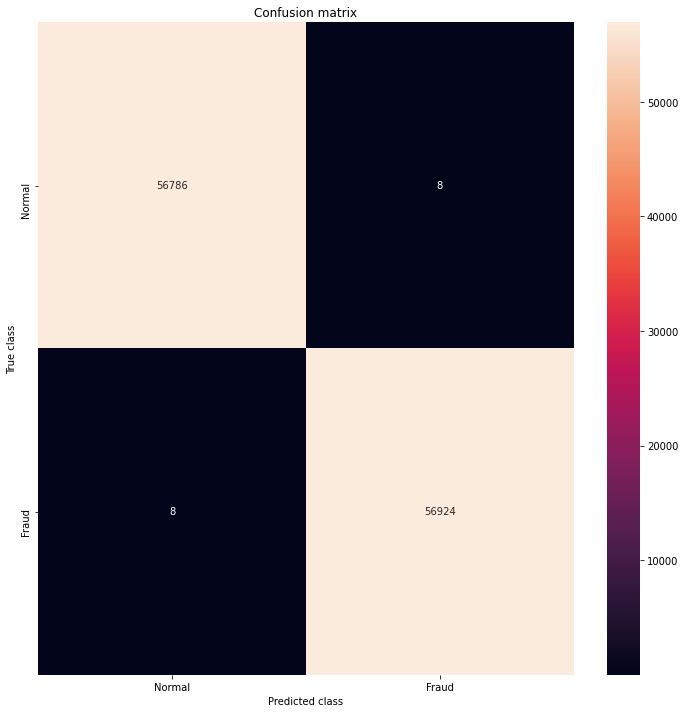

In [55]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(x_train_smote2, y_train_smote2) 
yPred = rfc.predict(x_test_smote2)

n_errors = (yPred != y_test_smote2).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(y_test_smote2, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test_smote2, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test_smote2, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test_smote2, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test_smote2, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test_smote2, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

#SMOTE(SVM)

In [56]:
x_train_smotesvm, x_test_smotesvm, y_train_smotesvm, y_test_smotesvm = train_test_split(x_resampled_smotesvm, y_resampled_smotesvm, test_size=0.2, random_state=42)
print(x_train_smotesvm.shape)
print(x_test_smotesvm.shape)
print(y_train_smotesvm.shape)
print(y_test_smotesvm.shape)

(454904, 30)
(113726, 30)
(454904,)
(113726,)


The model used is Random Forest classifier
The accuracy is 0.9998768971035648
The precision is 0.9999297876075127
The recall is 0.9998244875035103
The F1-Score is 0.9998771347831429
The Matthews correlation coefficient is0.9997537988520276


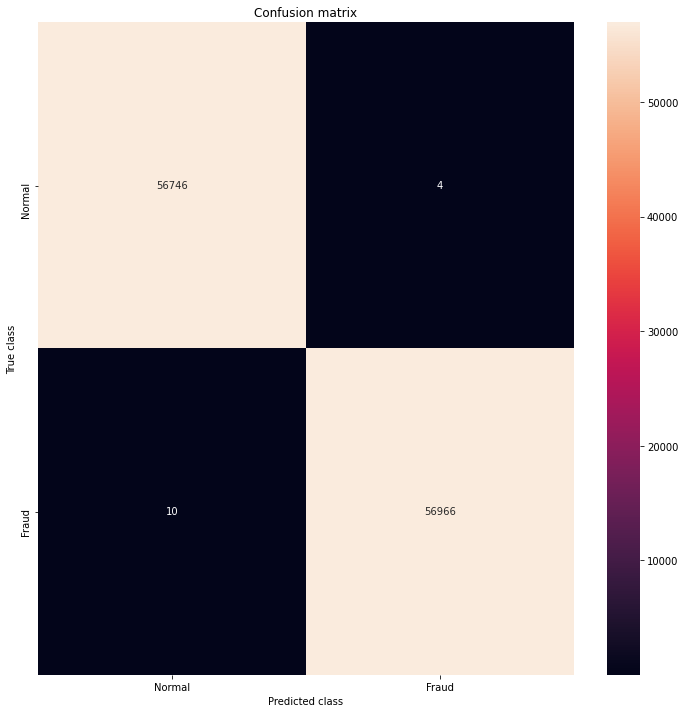

In [57]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(x_train_smotesvm, y_train_smotesvm) 
yPred = rfc.predict(x_test_smotesvm)

n_errors = (yPred != y_test_smotesvm).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(y_test_smotesvm, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test_smotesvm, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test_smotesvm, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test_smotesvm, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test_smotesvm, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test_smotesvm, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [58]:
x_train_adasyn, x_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(x_resampled_adasyn, y_resampled_adasyn, test_size=0.2, random_state=42)
print(x_train_adasyn.shape)
print(x_test_adasyn.shape)
print(y_train_adasyn.shape)
print(y_test_adasyn.shape)

(454890, 30)
(113723, 30)
(454890,)
(113723,)


The model used is Random Forest classifier
The accuracy is 0.9999032737440975
The precision is 0.9998067700739544
The recall is 1.0
The F1-Score is 0.9999033757016241
The Matthews correlation coefficient is0.9998065659829665


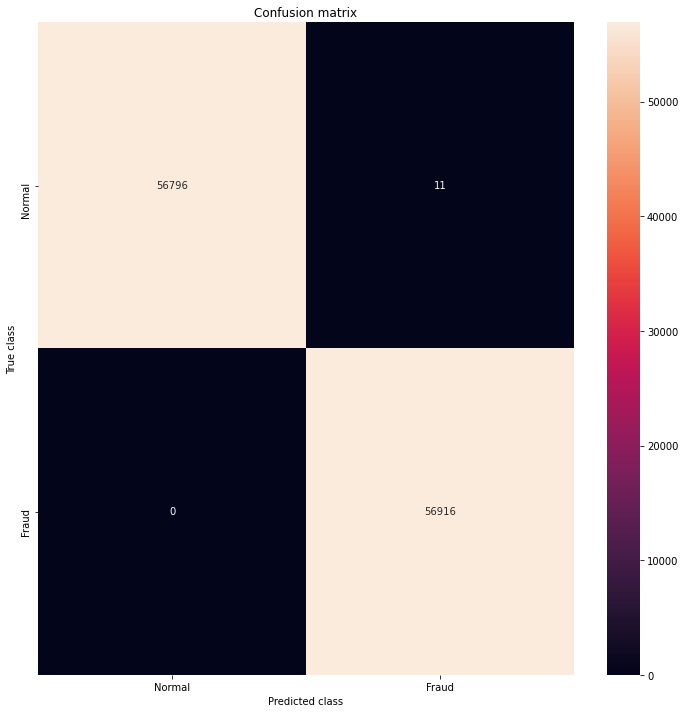

In [63]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(x_train_adasyn, y_train_adasyn) 
yPred = rfc.predict(x_test_adasyn)

n_errors = (yPred != y_test_adasyn).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(y_test_adasyn, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test_adasyn, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test_adasyn, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test_adasyn, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test_adasyn, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test_adasyn, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [59]:
x_train_nm1, x_test_nm1, y_train_nm1, y_test_nm1 = train_test_split(x_resampled_nm1, y_resampled_nm1, test_size=0.2, random_state=42)
print(x_train_nm1.shape)
print(x_test_nm1.shape)
print(y_train_nm1.shape)
print(y_test_nm1.shape)

(787, 30)
(197, 30)
(787,)
(197,)


In [60]:
x_train_nm2, x_test_nm2, y_train_nm2, y_test_nm2 = train_test_split(x_resampled_nm2, y_resampled_nm2, test_size=0.2, random_state=42)
print(x_train_nm2.shape)
print(x_test_nm2.shape)
print(y_train_nm2.shape)
print(y_test_nm2.shape)

(787, 30)
(197, 30)
(787,)
(197,)


In [61]:
x_train_nm3, x_test_nm3, y_train_nm3, y_test_nm3 = train_test_split(x_resampled_nm3, y_resampled_nm3, test_size=0.2, random_state=42)
print(x_train_nm3.shape)
print(x_test_nm3.shape)
print(y_train_nm3.shape)
print(y_test_nm3.shape)

(787, 30)
(197, 30)
(787,)
(197,)


In [62]:
x_train_cc, x_test_cc, y_train_cc, y_test_cc = train_test_split(x_resampled_cc, y_resampled_cc, test_size=0.2, random_state=42)
print(x_train_cc.shape)
print(x_test_cc.shape)
print(y_train_cc.shape)
print(y_test_cc.shape)

(787, 30)
(197, 30)
(787,)
(197,)
